In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/Validation.csv')
df.columns = df.columns.str.strip()

In [ ]:
# Function to compute metrics with R² = r²
def compute_metrics(obs, sim):
    r, p = pearsonr(obs, sim)
    r2 = r ** 2
    mae = mean_absolute_error(obs, sim)
    rmse = np.sqrt(mean_squared_error(obs, sim))
    mape = np.mean(np.abs((obs - sim) / obs)) * 100
    acc = 100 - mape
    return r, r2, p, mae, rmse, mape, acc

In [ ]:
# Variable pairs
pairs = {
    'Lagos Temperature': ('Temperature Lagos (Station)', 'Temperature Lagos (RS)'),
    'Lagos Rainfall': ('Rainfall Lagos (Station)', 'Rainfall Lagos (RS)'),
    'Kano Temperature': ('Temperature Kano (Station)', 'Temperature Kano (RS)'),
    'Kano Rainfall': ('Rainfall Kano (Station)', 'Rainfall Kano (RS)')
}


In [ ]:
# Calculate metrics
results = []
for name, (obs_col, sim_col) in pairs.items():
    obs = df[obs_col].astype(float)
    sim = df[sim_col].astype(float)
    results.append([name] + list(compute_metrics(obs, sim)))

metrics_df = pd.DataFrame(results, columns=['Variable', 'r', 'R²', 'p-value', 'MAE', 'RMSE', 'MAPE (%)', 'Estimated Accuracy (%)'])
print(metrics_df)

            Variable         r        R²       p-value         MAE  \
0  Lagos Temperature  0.710653  0.505028  1.316547e-12    0.430676   
1     Lagos Rainfall  0.225584  0.050888  5.329815e-02  320.374784   
2   Kano Temperature  0.815818  0.665559  8.565558e-19    0.646554   
3      Kano Rainfall  0.109322  0.011951  3.538243e-01  299.658176   

         RMSE   MAPE (%)  Estimated Accuracy (%)  
0    0.624876   1.571338               98.428662  
1  402.172384  20.281289               79.718711  
2    0.763487   2.398630               97.601370  
3  398.279111  29.291393               70.708607  


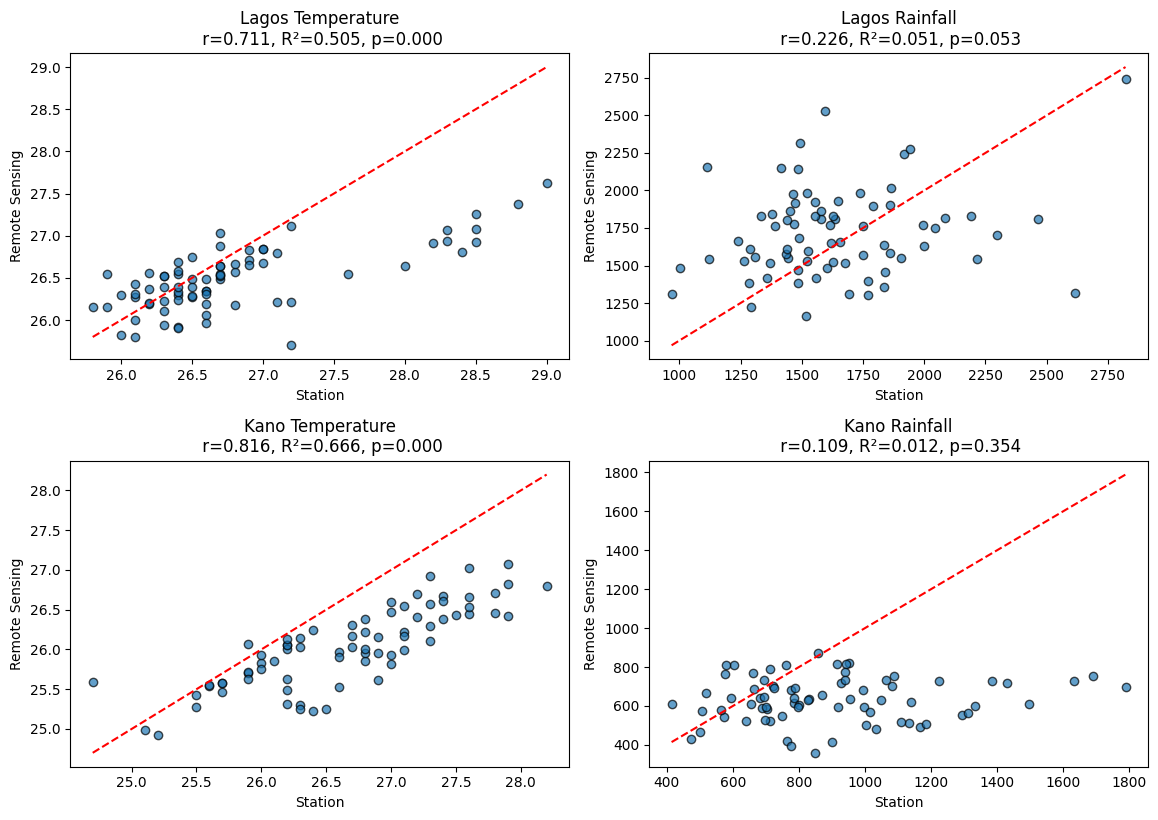

In [ ]:
# Scatter plot (2 x 2)
fig, axes = plt.subplots(2, 2, figsize=(11.7, 8.3))  # A4 landscape size
axes = axes.flatten()

for ax, (name, (obs_col, sim_col)) in zip(axes, pairs.items()):
    obs = df[obs_col].astype(float)
    sim = df[sim_col].astype(float)
    r, r2, p, mae, rmse, mape, acc = compute_metrics(obs, sim)

    ax.scatter(obs, sim, alpha=0.7, edgecolor='k')
    ax.plot([obs.min(), obs.max()], [obs.min(), obs.max()], 'r--')
    ax.set_title(f'{name}\n r={r:.3f}, R²={r2:.3f}, p={p:.3f}')
    ax.set_xlabel('Station')
    ax.set_ylabel('Remote Sensing')

plt.tight_layout()
plt.show()